In [1]:
import pandas as pd
# this function generates an item bank, in case the user cannot provide one
from catsim.cat import generate_item_bank
# simulation package contains the Simulator and all abstract classes
from catsim.simulation import *
# initialization package contains different initial proficiency estimation strategies
from catsim.initialization import *
# selection package contains different item selection strategies
from catsim.selection import *
# estimation package contains different proficiency estimation methods
from catsim.estimation import *
# stopping package contains different stopping criteria for the CAT
from catsim.stopping import *
import catsim.plot as catplot
from catsim.irt import icc
from catsim.irt import detect_model


# this function generates an item bank, in case the user cannot provide one
from catsim.cat import generate_item_bank
# simulation package contains the Simulator and all abstract classes
from catsim.simulation import *
# initialization package contains different initial proficiency estimation strategies
from catsim.initialization import *
# selection package contains different item selection strategies
from catsim.selection import *
# estimation package contains different proficiency estimation methods
from catsim.estimation import *
# stopping package contains different stopping criteria for the CAT
from catsim.stopping import *
import catsim.plot as catplot
from catsim.irt import icc

import sys
import torch  
import gym
import numpy as np  
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt
import pandas as pd
from statistics import mean

import numpy as np
import matplotlib.pyplot as plt
import PIL.Image as Image
import gym
import random

from gym import Env, spaces
import time

from IPython import display
from random import randint
import statistics

C:\Users\patri\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
# !pip install --upgrade Pandas

In [3]:
# !pip install --upgrade pip

In [9]:
alunos = pd.read_excel('C:/Users/patri/Desktop/Base_enem/enem.xlsx')
alunos

,MT1,MT2,MT3,MT4,MT5,MT6,MT7,MT8,MT9,MT10,...,ES1,ES2,ES3,ES4,ES5,IN1,IN2,IN3,IN4,IN5
0,True,False,True,True,True,True,True,True,True,True,...,NaN,NaN,NaN,NaN,NaN,True,False,False,True,False
1,False,False,True,True,True,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,False,False,False,True,True
2,False,True,True,False,False,False,False,False,False,False,...,True,False,True,False,False,NaN,NaN,NaN,NaN,NaN
3,True,True,True,True,True,True,True,True,True,True,...,NaN,NaN,NaN,NaN,NaN,False,False,False,True,False
4,False,True,False,False,False,False,False,False,True,False,...,NaN,NaN,NaN,NaN,NaN,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,True,True,False,False,True,False,False,False,...,False,False,True,True,True,NaN,NaN,NaN,NaN,NaN
9996,True,False,False,True,False,False,False,False,True,True,...,NaN,NaN,NaN,NaN,NaN,False,False,True,True,False
9997,False,False,True,True,False,False,False,False,False,False,...,True,False,True,False,True,NaN,NaN,NaN,NaN,NaN
9998,True,False,True,True,True,False,False,False,True,False,...,True,True,True,True,True,NaN,NaN,NaN,NaN,NaN


In [11]:
full_items = list(range(0, 9999))
full_items

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


Theta Original:  0.5255011257402589
aluno: 0
Estimated proficiency, given answered items: 1.381888535
erro: 0.8563874092597412
nq: 1
Estimated proficiency, given answered items: 2.0728328025000002
erro: 1.5473316767597414
nq: 2
Estimated proficiency, given answered items: 2.41830493625
erro: 1.8928038105097413
nq: 3
Estimated proficiency, given answered items: 2.5910410031250004
erro: 2.0655398773847415
nq: 4
Estimated proficiency, given answered items: 2.6774090365625005
erro: 2.1519079108222416
nq: 5
Estimated proficiency, given answered items: 2.7205930532812506
erro: 2.1950919275409917
nq: 6
Estimated proficiency, given answered items: 2.742185061640625
erro: 2.2166839359003663
nq: 7
Estimated proficiency, given answered items: 3.10947043533739
erro: 2.5839693095971312
nq: 8
Estimated proficiency, given answered items: 2.951729657607881
erro: 2.426228531867622
nq: 9
Estimated proficiency, given answered items: 2.9713013831558546
erro: 2.4458002574155957
nq: 10
Estimated proficiency

Estimated proficiency, given answered items: 2.757173244905251
erro: 2.231672119164992
nq: 44
Estimated proficiency, given answered items: 2.757516679214852
erro: 2.2320155534745934
nq: 45
aluno: 1
Estimated proficiency, given answered items: -0.2033464503925737
erro: 0.7288475761328326
nq: 1
Estimated proficiency, given answered items: 1.7350808933077388
erro: 1.20957976756748
nq: 2
Estimated proficiency, given answered items: 1.0079116578892162
erro: 0.48241053214895735
nq: 3
Estimated proficiency, given answered items: 0.3914251971619519
erro: 0.13407592857830697
nq: 4
Estimated proficiency, given answered items: 0.041974417828958464
erro: 0.4835267079113004
nq: 5
Estimated proficiency, given answered items: 0.2231066839030915
erro: 0.30239444183716735
nq: 6
Estimated proficiency, given answered items: 0.4252050593756456
erro: 0.10029606636461325
nq: 7
Estimated proficiency, given answered items: 0.27106296546564007
erro: 0.2544381602746188
nq: 8
Estimated proficiency, given answere

Estimated proficiency, given answered items: -0.4016402831814837
erro: 0.9271414089217426
nq: 23
Estimated proficiency, given answered items: -0.4701590605928952
erro: 0.995660186333154
nq: 24
Estimated proficiency, given answered items: -0.4702407992466504
erro: 0.9957419249869093
nq: 25
Estimated proficiency, given answered items: -0.5044935816052443
erro: 1.0299947073455031
nq: 26
Estimated proficiency, given answered items: -0.505877484855611
erro: 1.03137861059587
nq: 27
Estimated proficiency, given answered items: -0.5187281710838864
erro: 1.0442292968241453
nq: 28
Estimated proficiency, given answered items: -0.4659816666009065
erro: 0.9914827923411653
nq: 29
Estimated proficiency, given answered items: -0.48135664252687477
erro: 1.0068577682671336
nq: 30
Estimated proficiency, given answered items: -0.4825696594412492
erro: 1.008070785181508
nq: 31
Estimated proficiency, given answered items: -0.19148122534970732
erro: 0.7169823510899662
nq: 32
Estimated proficiency, given answ

Estimated proficiency, given answered items: 2.780360023555809
erro: 2.25485889781555
nq: 20
Estimated proficiency, given answered items: 2.8638851741736064
erro: 2.3383840484333476
nq: 21
Estimated proficiency, given answered items: 2.8645582592310506
erro: 2.3390571334907917
nq: 22
Estimated proficiency, given answered items: 2.7891347052356203
erro: 2.2636335794953615
nq: 23
Estimated proficiency, given answered items: 2.743562904793146
erro: 2.218061779052887
nq: 24
Estimated proficiency, given answered items: 2.7591736218076828
erro: 2.233672496067424
nq: 25
Estimated proficiency, given answered items: 2.75917340357228
erro: 2.2336722778320213
nq: 26
Estimated proficiency, given answered items: 2.7614760817743784
erro: 2.2359749560341196
nq: 27
Estimated proficiency, given answered items: 2.7685901327439875
erro: 2.2430890070037286
nq: 28
Estimated proficiency, given answered items: 2.7699639198758663
erro: 2.2444627941356075
nq: 29
Estimated proficiency, given answered items: 2.7

erro: 0.7132488288151175
nq: 37
Estimated proficiency, given answered items: 1.2402636592790843
erro: 0.7147625335388255
nq: 38
Estimated proficiency, given answered items: 1.237124762519638
erro: 0.7116236367793791
nq: 39
Estimated proficiency, given answered items: 1.233773819498462
erro: 0.7082726937582031
nq: 40
Estimated proficiency, given answered items: 1.2304402453517087
erro: 0.7049391196114498
nq: 41
Estimated proficiency, given answered items: 1.2278335914039755
erro: 0.7023324656637167
nq: 42
Estimated proficiency, given answered items: 1.2255428358796376
erro: 0.7000417101393788
nq: 43
Estimated proficiency, given answered items: 1.2253132794254014
erro: 0.6998121536851425
nq: 44
Estimated proficiency, given answered items: 1.2253143372556676
erro: 0.6998132115154088
nq: 45
Estimated proficiency, given answered items: -0.9694476213721661
erro: 1.494948747112425
nq: 1
Estimated proficiency, given answered items: -2.066828600686083
erro: 2.592329726426342
nq: 2
Estimated pro

Estimated proficiency, given answered items: -0.4925575431055535
erro: 1.0180586688458124
nq: 6
Estimated proficiency, given answered items: -0.25441178802927444
erro: 0.7799129137695333
nq: 7
Estimated proficiency, given answered items: -0.37755465755603734
erro: 0.9030557832962962
nq: 8
Estimated proficiency, given answered items: -0.4683469540856778
erro: 0.9938480798259366
nq: 9
Estimated proficiency, given answered items: -0.5314920618017107
erro: 1.0569931875419696
nq: 10
Estimated proficiency, given answered items: -0.5712864127411621
erro: 1.096787538481421
nq: 11
Estimated proficiency, given answered items: -0.6017509614762898
erro: 1.1272520872165486
nq: 12
Estimated proficiency, given answered items: -0.6408016680783564
erro: 1.1663027938186152
nq: 13
Estimated proficiency, given answered items: -0.6814347425622258
erro: 1.2069358683024847
nq: 14
Estimated proficiency, given answered items: -0.6003836993607314
erro: 1.1258848251009903
nq: 15
Estimated proficiency, given answ

Estimated proficiency, given answered items: -1.6024654533997102
erro: 2.127966579139969
nq: 38
Estimated proficiency, given answered items: -3.095187848880381
erro: 3.6206889746206397
nq: 39
Estimated proficiency, given answered items: -3.0951687841848563
erro: 3.620669909925115
nq: 40
Estimated proficiency, given answered items: -3.0951811093043013
erro: 3.62068223504456
nq: 41
Estimated proficiency, given answered items: -3.0958544033010504
erro: 3.6213555290413093
nq: 42
Estimated proficiency, given answered items: -3.0958544389045826
erro: 3.6213555646448414
nq: 43
Estimated proficiency, given answered items: -3.0958549066188117
erro: 3.6213560323590706
nq: 44
Estimated proficiency, given answered items: -3.095855408020062
erro: 3.621356533760321
nq: 45
aluno: 9
Estimated proficiency, given answered items: -0.1660391690100309
erro: 0.6915402947502898
nq: 1
Estimated proficiency, given answered items: 1.2988689504949846
erro: 0.7733678247547258
nq: 2
Estimated proficiency, given an

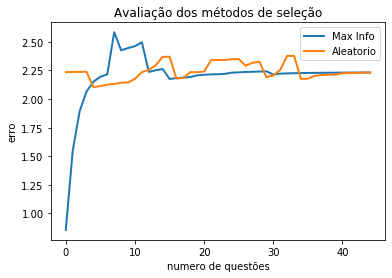

In [14]:
alunos = pd.read_excel('C:/Users/patri/Desktop/Base_enem/enem.xlsx')
param = pd.read_excel('C:/Users/patri/Desktop/Base_enem/parametros.xlsx')
items = param.iloc[0:45,1:5].to_numpy()

mu = -4
sigma = 0
nq = 0

aluno_vet = list(range(0, 10))

responses = []
administered_items = []
theta_est = []
erro_theta = []

initializer = RandomInitializer()
selector_vet = [MaxInfoSelector(),RandomSelector()]
estimator = NumericalSearchEstimator()
est_theta = initializer.initialize()

full_items = list(range(0, 45))
respostas = alunos.iloc[aluno,0:45].tolist()
ori_theta = estimator.estimate(items=items, administered_items=full_items, response_vector=respostas, est_theta=est_theta)
print('Theta Original: ',ori_theta)

mu = 0
sigma = 0
nq = 0
est_theta=0

result = np.reshape(list(range(0, 45)),(1,45))

for aluno in aluno_vet: 
    print('aluno:', aluno)
    
    for selector in selector_vet:
        responses = []
        administered_items = []
        theta_est = []
        erro_theta = []
        for nq in range(0, 45):
            item_index = selector.select(items=items, administered_items=administered_items, est_theta=est_theta)

            correct = alunos.iloc[aluno,item_index]
            administered_items.append(item_index)
            responses.append(correct)

            est_theta = estimator.estimate(items=items, administered_items=administered_items, response_vector=responses, est_theta=est_theta)
            print('Estimated proficiency, given answered items:', est_theta)
            theta_est.append(est_theta)

            erro = abs(ori_theta - est_theta)
            print('erro:', erro)
            erro_theta.append(erro)

            nq = nq+1
            print('nq:', nq)

        erro_theta = np.reshape(erro_theta,(1,45))
        result = np.concatenate((result, erro_theta), axis=0)
        aluno

    
# define a legenda e tamanho de linhas
plt.plot(range(0, 45), result[1,], label='Max Info', linewidth=2)
plt.plot(range(0, 45), result[2,], label='Aleatorio', linewidth=2)

plt.xlabel('numero de questões')
plt.ylabel('erro')

plt.title("Avaliação dos métodos de seleção")

# Exibe a legenda e por padrão usa o label de cada plot.
plt.legend()

plt.show()

In [69]:
result = np.array(list(range(0, 45)))

In [77]:
result

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44])

In [71]:
erro_theta = np.array(erro_theta)

In [73]:
erro_theta.shape

(45,)

In [82]:
type(result)

numpy.ndarray

In [97]:
x = np.array(list(range(0, 45)))
x.shape

x = np.reshape(x,(9,5))
x

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34],
       [35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44]])

In [99]:
erro_theta1 = np.reshape(erro_theta,(1,45))
result1 = np.reshape(list(range(0, 45)),(1,45))

In [102]:
result = np.concatenate((result1, erro_theta1), axis=0)

In [103]:
result

array([[0.00000000e+00, 1.00000000e+00, 2.00000000e+00, 3.00000000e+00,
        4.00000000e+00, 5.00000000e+00, 6.00000000e+00, 7.00000000e+00,
        8.00000000e+00, 9.00000000e+00, 1.00000000e+01, 1.10000000e+01,
        1.20000000e+01, 1.30000000e+01, 1.40000000e+01, 1.50000000e+01,
        1.60000000e+01, 1.70000000e+01, 1.80000000e+01, 1.90000000e+01,
        2.00000000e+01, 2.10000000e+01, 2.20000000e+01, 2.30000000e+01,
        2.40000000e+01, 2.50000000e+01, 2.60000000e+01, 2.70000000e+01,
        2.80000000e+01, 2.90000000e+01, 3.00000000e+01, 3.10000000e+01,
        3.20000000e+01, 3.30000000e+01, 3.40000000e+01, 3.50000000e+01,
        3.60000000e+01, 3.70000000e+01, 3.80000000e+01, 3.90000000e+01,
        4.00000000e+01, 4.10000000e+01, 4.20000000e+01, 4.30000000e+01,
        4.40000000e+01],
       [1.51469008e+00, 7.61194867e-01, 1.72187795e-01, 5.17057097e-01,
        2.70419066e-01, 4.96559567e-01, 2.76578116e-01, 9.63886155e-02,
        1.79552508e-01, 2.45292216e-01,

In [105]:
result[1,]

array([1.51469008e+00, 7.61194867e-01, 1.72187795e-01, 5.17057097e-01,
       2.70419066e-01, 4.96559567e-01, 2.76578116e-01, 9.63886155e-02,
       1.79552508e-01, 2.45292216e-01, 1.30742592e-01, 1.84122352e-01,
       6.14600651e-02, 9.73749039e-02, 1.26284099e-01, 1.60992082e-01,
       1.11460793e-01, 1.29386848e-01, 7.14763765e-02, 4.09614470e-03,
       1.41869217e-02, 7.58463739e-02, 5.76447972e-02, 3.25959872e-02,
       1.86209599e-02, 5.94690259e-03, 4.20741372e-03, 1.06903342e-02,
       1.77179057e-02, 2.32142554e-02, 1.04559142e-02, 5.88233749e-04,
       2.95507333e-03, 4.52340903e-03, 5.27633529e-03, 2.68472457e-03,
       6.45090745e-04, 9.31456634e-04, 4.35625582e-04, 2.29373219e-04,
       7.23979502e-05, 6.68734740e-05, 4.45739440e-05, 2.96625764e-06,
       2.97067926e-12])

In [20]:
statistics.pstdev(ori_theta, est_theta)

TypeError: 'numpy.float64' object is not iterable

In [13]:
theta_est

[-1.58210479,
 -2.373157185,
 -2.7686833825,
 -2.96644648125,
 -3.0653280306250004,
 -3.1147688053125,
 -3.1394891926562503,
 -3.1518493863281254,
 -3.1580294831640625,
 -3.161119531582031,
 -3.1626645557910154,
 -3.163437067895508,
 -3.163823323947754,
 -3.164016451973877,
 -3.1641130159869384,
 -3.164161297993469,
 -5.140200444692214,
 -5.140200282139706,
 -5.140200173992267,
 -5.1401991861146,
 -5.140199185579712,
 -5.140201616498957,
 -5.140201524649857,
 -5.140201476954154,
 -5.14019852656503,
 -5.1402016618455315,
 -5.140199102312356,
 -5.140199077527047,
 -1.8808511214904264,
 -1.3456527481840124,
 -1.366895556089,
 -1.3676690514218426,
 -1.3717808935410614,
 -1.3735449915209648,
 -1.54965861929661,
 -1.62234797825814,
 -1.6223765029469341,
 -1.6069102075404347,
 -1.6504632608224363,
 -1.6505814154969933,
 -1.6503546706704326,
 -1.6502406572797361,
 -1.6506791206211435,
 -1.620077517127448,
 -1.6272711680767284]

In [24]:
correct

False

In [26]:
erro_theta

[0.9371706319868588,
 0.17176929782723294,
 0.33793901805213444,
 0.1503728251908747,
 0.06715416619867742,
 0.3166078924474536,
 0.18392412770065925,
 0.010679490455149043,
 0.1186304037525634,
 0.058289449670948845,
 0.1228783418241699,
 0.07966167100603117,
 0.12437780970160106,
 0.039401155707332935,
 0.06496324395454744,
 0.08815971705009684,
 0.05775505077640819,
 0.08307651211233091,
 0.1268580279826601,
 0.09740359685980238,
 0.07626501786427309,
 0.046964790891791675,
 0.032242364753676644,
 0.009868052238195035,
 0.0055032103065464355,
 0.0013464520663510893,
 0.015241782124755798,
 0.03647278924672459,
 0.014990227182846039,
 0.021694366030867385,
 0.006421357457211452,
 0.012390030478855618,
 0.001966857139436784,
 0.0011864387856957426,
 0.003111546026102363,
 0.004826370025888871,
 0.005937580814756371,
 0.0016660831543542365,
 0.002583804436290804,
 0.0031929778134285325,
 0.0005235544344040499,
 0.0009324124179154181,
 8.313641884361012e-07,
 1.4941374455790246e-05,
 2.